# Facebook Data Crawling
After the data is collected, we need to process the data to make it more readable and easier to analyze. We can do some simple visualization to see the data distribution and the relationship between the data. We can also do some simple data cleaning to remove the data that is not needed. In this notebook, we will do some simple data processing on the data we collected from Facebook.

In [2]:
%pip install matplotlib pandas numpy seaborn wordcloud

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('Data/binhluanvienAnhQuan_clean.csv')


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 61 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     112 non-null    int64  
 1   post_id                        112 non-null    int64  
 2   text                           112 non-null    object 
 3   post_text                      112 non-null    object 
 4   shared_text                    38 non-null     object 
 5   time                           112 non-null    object 
 6   timestamp                      112 non-null    float64
 7   image                          74 non-null     object 
 8   image_lowquality               112 non-null    object 
 9   images                         112 non-null    object 
 10  images_description             112 non-null    object 
 11  images_lowquality              112 non-null    object 
 12  images_lowquality_description  112 non-null    obj

# Phân tích tổng số lượng tương tác giữa các bài đăng


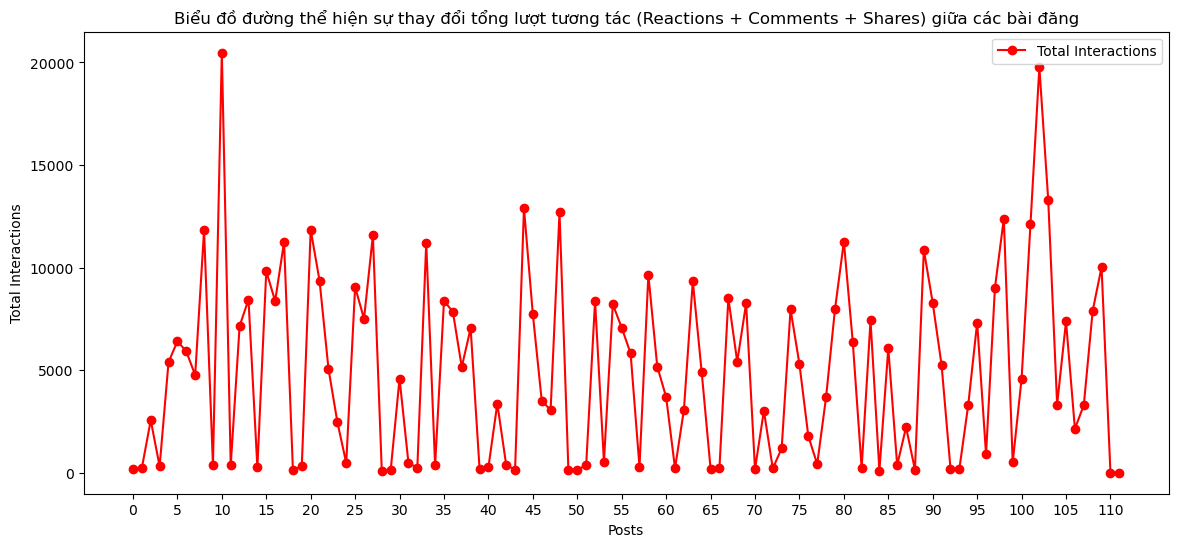

In [6]:
# Vẽ biểu đồ đường thể hiện sự thay đổi tổng lượt tương tác (Reactions + Comments + Shares) giữa các bài đăng

# Tính tổng số lượt tương tác (Reactions + Shares + Comments)
df['total_interactions'] = df['reaction_count'] + df['shares'] + df['comments']

# Vẽ biểu đồ đường cho tổng số lượt tương tác của mỗi bài đăng
plt.figure(figsize=(14, 6))

plt.plot(np.arange(len(df)), df['total_interactions'], label='Total Interactions', color='red', marker = 'o')

plt.xticks(np.arange(0, len(df), step=5))

plt.title('Biểu đồ đường thể hiện sự thay đổi tổng lượt tương tác (Reactions + Comments + Shares) giữa các bài đăng')
plt.xlabel('Posts')
plt.ylabel('Total Interactions')
plt.legend()
plt.show()

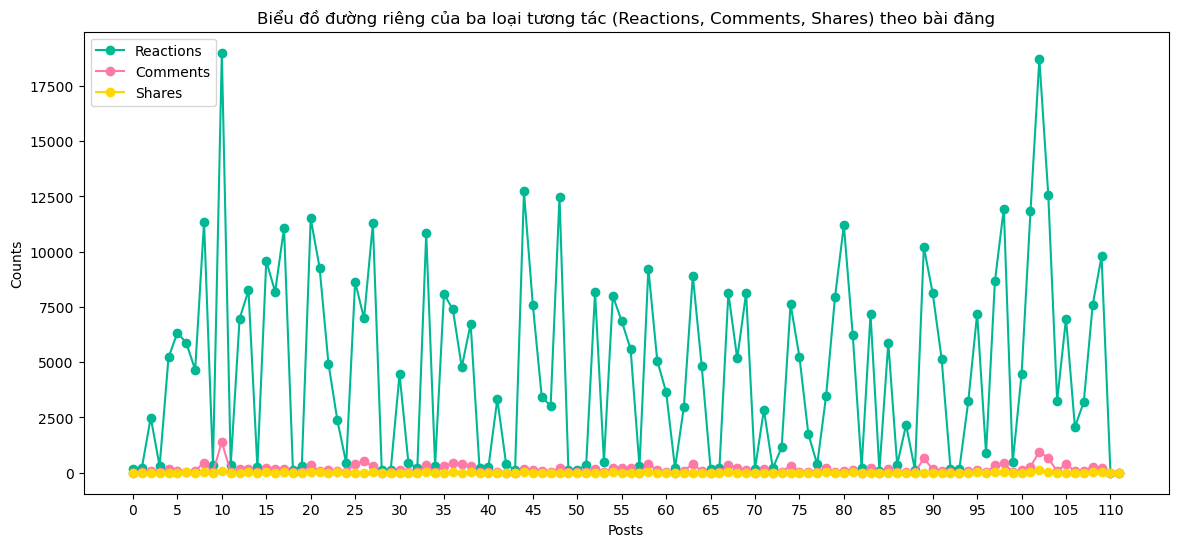

In [7]:
# Vẽ biểu đồ đường riêng của ba loại tương tác (Reactions, Comments, Shares) giữa các bài đăng

plt.figure(figsize=(14, 6))

plt.plot(np.arange(len(df)), df['reaction_count'], label='Reactions', color='#00b894', marker = 'o')
plt.plot(np.arange(len(df)), df['comments'], label='Comments', color='#fd79a8', marker = 'o')
plt.plot(np.arange(len(df)), df['shares'], label='Shares', color='#ffd700', marker = 'o')

plt.xticks(np.arange(0, len(df), step=5))

plt.title('Biểu đồ đường riêng của ba loại tương tác (Reactions, Comments, Shares) theo bài đăng')
plt.xlabel('Posts')
plt.ylabel('Counts')
plt.legend()
plt.show()

# Bài viết có lượng tương tác lớn nhất

In [8]:
df.head()

,Unnamed: 0,post_id,text,post_text,shared_text,time,timestamp,image,image_lowquality,images,...,phẫn nộ.1,thích.1,thương thương.1,wow.1,yêu thích.1,hour,day,month,year,total_interactions
0,16,910240270466036,Đây là một trong những bê bối lớn nhất của làn...,Đây là một trong những bê bối lớn nhất của làn...,BLV Anh Quân TV\n22 tháng 11 lúc 16:11 ·\n\nHọ...,2023-11-22 16:16:09,1.700645e+09,NaN,https://scontent.fhan14-2.fna.fbcdn.net/v/t15....,[],...,0.0,156.0,0.0,0.0,9.0,16,22,11,2023,170
1,17,910218473801549,Ai muốn thắng Đức thì... Đức mời\n\nBLV Anh Qu...,Ai muốn thắng Đức thì... Đức mời,BLV Anh Quân Sport\n22 tháng 11 lúc 15:00 ·\n\...,2023-11-22 15:09:29,1.700641e+09,NaN,https://scontent.fhan14-1.fna.fbcdn.net/v/t15....,[],...,0.0,174.0,0.0,1.0,3.0,15,22,11,2023,232
2,18,910201763803220,Nhiệm vụ bất khả thi: Tiến vào top 4.,Nhiệm vụ bất khả thi: Tiến vào top 4.,NaN,2023-11-22 14:15:44,1.700637e+09,https://scontent.fhan14-3.fna.fbcdn.net/v/t39....,https://scontent.fhan14-3.fna.fbcdn.net/v/t39....,['https://scontent.fhan14-3.fna.fbcdn.net/v/t3...,...,1.0,2126.0,1.0,0.0,25.0,14,22,11,2023,2560
3,19,910158997140830,Xem mà sợ thật...\n\nBLV Anh Quân Sport\n22 th...,Xem mà sợ thật...,BLV Anh Quân Sport\n22 tháng 11 lúc 11:44 ·\n\...,2023-11-22 11:49:39,1.700629e+09,NaN,https://scontent.fhan14-1.fna.fbcdn.net/v/t15....,[],...,1.0,277.0,1.0,1.0,5.0,11,22,11,2023,311
4,20,910114627145267,Argentina thắng Brazil tại Maracana.\n\nTừ đó ...,Argentina thắng Brazil tại Maracana.\n\nTừ đó ...,NaN,2023-11-22 10:01:44,1.700622e+09,https://scontent.fhan14-3.fna.fbcdn.net/v/t39....,https://scontent.fhan14-3.fna.fbcdn.net/v/t39....,['https://scontent.fhan14-3.fna.fbcdn.net/v/t3...,...,2.0,4682.0,14.0,3.0,434.0,10,22,11,2023,5385


In [9]:
df['total_interaction'] = df['reaction_count'] + df['comments'] + df['shares']
highest_interaction_post = df.loc[df['total_interaction'] == df['total_interaction'].max()]

In [10]:
highest_interaction_post

,Unnamed: 0,post_id,text,post_text,shared_text,time,timestamp,image,image_lowquality,images,...,thích.1,thương thương.1,wow.1,yêu thích.1,hour,day,month,year,total_interactions,total_interaction
10,26,909823600507703,Không có cảm giác gì tiếc hơn.,Không có cảm giác gì tiếc hơn.,NaN,2023-11-21 20:56:36,1.700575e+09,https://m.facebook.com/photo/view_full_size/?f...,https://scontent.fhan14-2.fna.fbcdn.net/v/t39....,['https://m.facebook.com/photo/view_full_size/...,...,14691.0,41.0,28.0,132.0,20,21,11,2023,20475,20475


In [11]:
highest_interaction_post[['post_id', 'text', 'time', 'total_interaction']]

,post_id,text,time,total_interaction
10,909823600507703,Không có cảm giác gì tiếc hơn.,2023-11-21 20:56:36,20475


<Axes: xlabel='n-th highest interacted post', ylabel='Total interaction'>

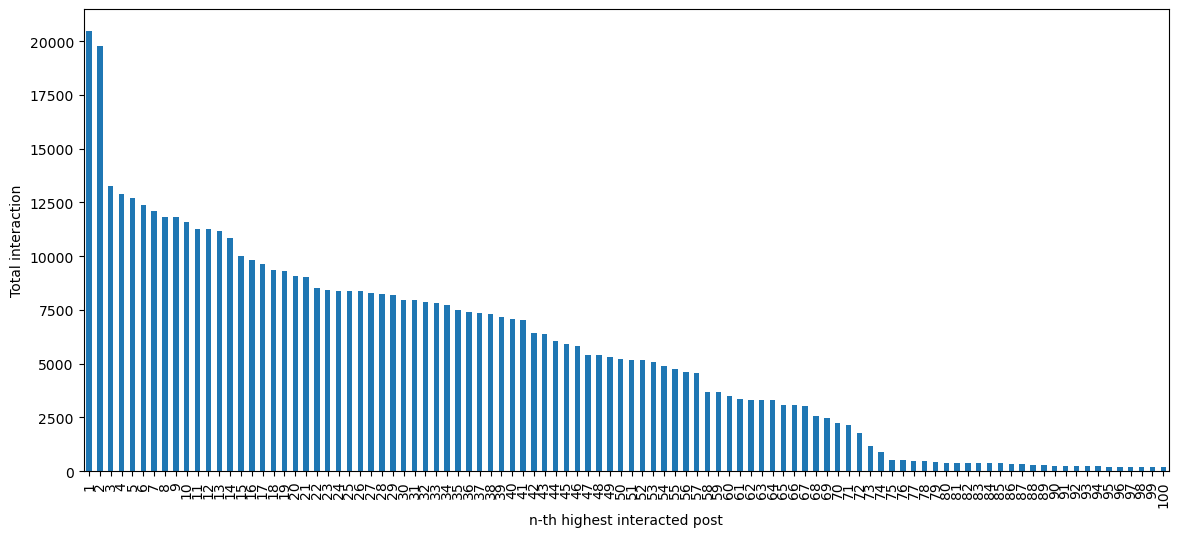

In [12]:
# Sự giảm dần số lượng tương tác qua các bài đăng
most_100 = df['total_interaction'].sort_values(ascending= False)[:100]
most_100.index = map(int, np.linspace(1, 100, 100))
most_100.plot(kind= 'bar', figsize= (14, 6), ylabel= 'Total interaction', xlabel= 'n-th highest interacted post')

# Mốc thời gian trong ngày Fanpage đăng bài

In [13]:
plot_data = df['hour'].value_counts().sort_index()
mean = df['hour'].value_counts().mean() * np.ones(len(plot_data))

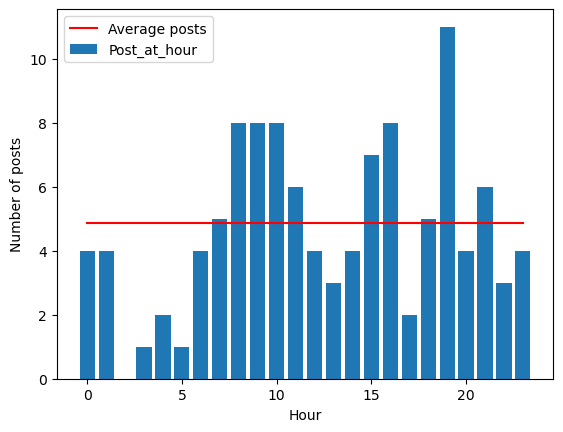

In [14]:
plt.bar(plot_data.index, plot_data.values, label= 'Post_at_hour')
plt.plot(plot_data.index, mean, color = 'red', label= 'Average posts')
plt.legend()
plt.ylabel('Number of posts')
plt.xlabel('Hour')
plt.show()

# Những khoảng thời gian nhận nhiều tương tác nhất trong ngày

Text(0.5, 0, 'Hours')

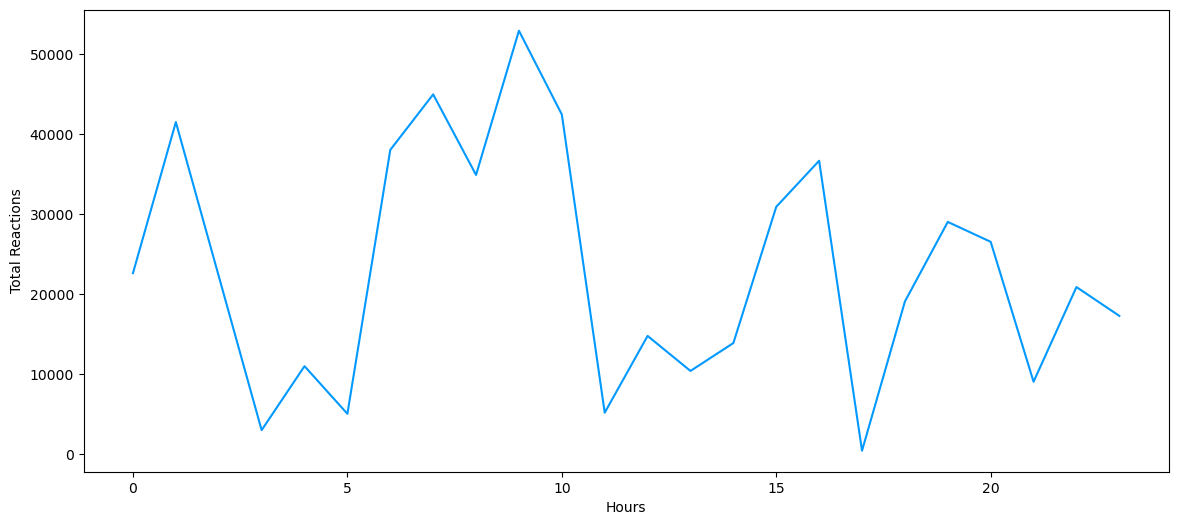

In [15]:
total_reactions_by_hour = df.groupby('hour')['reaction_count'].sum()

fig,ax=plt.subplots(figsize=(14,6))

ax.plot(total_reactions_by_hour.index, total_reactions_by_hour.values, color='#0099FF', label='Total Reactions')
ax.set_ylabel('Total Reactions')
ax.tick_params(axis='y')

plt.xlabel('Hours')

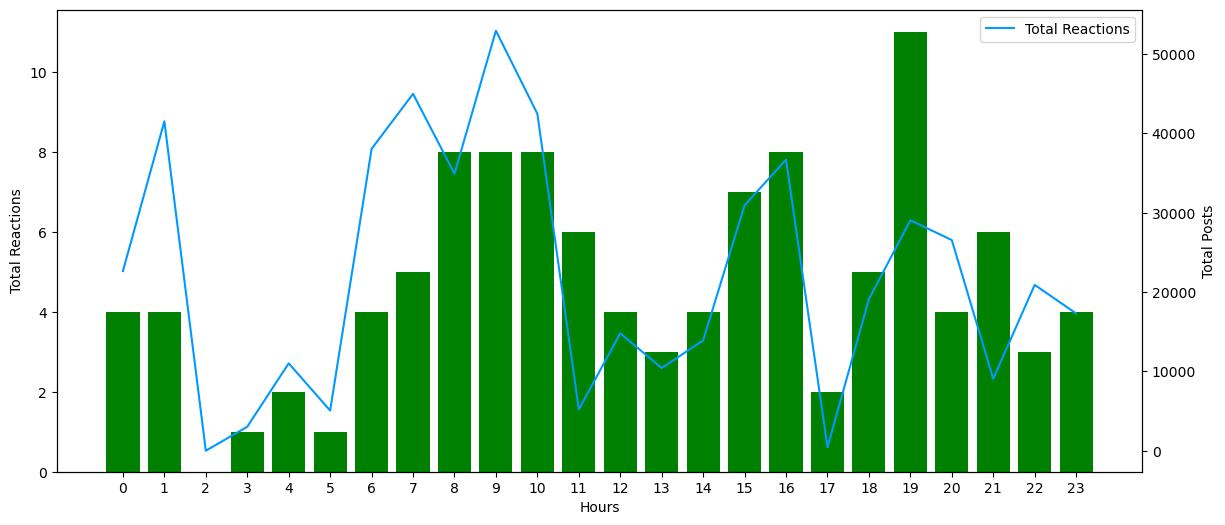

In [16]:
total_posts_by_hour = df['hour'].value_counts()

total_posts_by_hour = total_posts_by_hour.reindex(range(24), fill_value=0)
total_reactions_by_hour = total_reactions_by_hour.reindex(range(24), fill_value=0)

fig, ax1 = plt.subplots(figsize=(14, 6))
ax2 = ax1.twinx()

ax1.bar(total_posts_by_hour.index, total_posts_by_hour.values, color='green', label='Total Posts')
ax1.set_xticks(total_reactions_by_hour.index)
ax1.set_xlabel('Hours')
ax1.set_ylabel('Total Reactions')
ax1.tick_params(axis='y')


ax2.plot(total_reactions_by_hour.index, total_reactions_by_hour.values, color='#0099FF', label='Total Reactions')
ax2.set_ylabel('Total Posts')
ax2.tick_params(axis='y')

plt.xlabel('Hours')
plt.legend()

# Từ khóa xuất hiện nhiều nhất trong các bài đăng thu thập được.

In [17]:
df['text']
all_text = df['text'].str.split()

In [18]:
# tạo list chứa tất cả các từ đơn
cleaned_words = []
for i in all_text:
    try:
        # print(text)
        cleaned_words.extend(i)
    except Exception:
        continue
        
cleaned_words

['Đây',
 'là',
 'một',
 'trong',
 'những',
 'bê',
 'bối',
 'lớn',
 'nhất',
 'của',
 'làng',
 'bóng',
 'chuyền',
 'Hàn',
 'Quốc,',
 'cũng',
 'như',
 'làng',
 'thể',
 'thao',
 'thế',
 'giới.',
 'BLV',
 'Anh',
 'Quân',
 'TV',
 '22',
 'tháng',
 '11',
 'lúc',
 '16:11',
 '·',
 'Họ',
 'được',
 'coi',
 'là',
 'cặp',
 'song',
 'sinh',
 'tài',
 'năng',
 'nhất',
 'của',
 'làng',
 'bóng',
 'chuyền',
 'xứ',
 'sở',
 'Kim',
 'chi,',
 'nhưng',
 'lại',
 'vướng',
 'vào',
 'một',
 'trong',
 'những',
 'scandal',
 'từng',
 'gây',
 'rúng',
 'động',
 'thể',
 'thao',
 'Hàn',
 'Quốc',
 'Ai',
 'muốn',
 'thắng',
 'Đức',
 'thì...',
 'Đức',
 'mời',
 'BLV',
 'Anh',
 'Quân',
 'Sport',
 '22',
 'tháng',
 '11',
 'lúc',
 '15:00',
 '·',
 'Cỗ',
 'xe',
 'tăng',
 'Đức',
 'bây',
 'giờ',
 'đây',
 'sao???',
 '#BLVAnhQuan',
 '#euro2024',
 '#germany',
 '#MCV',
 'Nhiệm',
 'vụ',
 'bất',
 'khả',
 'thi:',
 'Tiến',
 'vào',
 'top',
 '4.',
 'Xem',
 'mà',
 'sợ',
 'thật...',
 'BLV',
 'Anh',
 'Quân',
 'Sport',
 '22',
 'tháng',
 '11',
 'lú

In [19]:
#tạo dict đếm các từ và sắp xếp chọn ra 10 từ xuất hiện nhiều nhất
word_counts = {}
for word in cleaned_words:
    word_counts[word] = word_counts.get(word, 0) + 1

top_10_words = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)[:10]

#in 10 từ xuất hiện nhiều nhất
print("Top 10 words:")
for word, count in top_10_words:
    print(f"{word}: {count}")

Top 10 words:
của: 44
lúc: 43
là: 42
Anh: 42
tháng: 40
11: 38
·: 38
BLV: 37
Quân: 36
Sport: 28


In [20]:
df_text = df[['post_id','post_text']]
text    = str(df_text['post_text'])

df_text

,post_id,post_text
0,910240270466036,Đây là một trong những bê bối lớn nhất của làn...
1,910218473801549,Ai muốn thắng Đức thì... Đức mời
2,910201763803220,Nhiệm vụ bất khả thi: Tiến vào top 4.
3,910158997140830,Xem mà sợ thật...
4,910114627145267,Argentina thắng Brazil tại Maracana.\n\nTừ đó ...
...,...,...
107,905139927642737,"Sau khi bị Jackson sút vào mắt, fan Chelsea đó..."
108,905136484309748,"Coi nào, ai đây..."
109,905132497643480,Robin Hood again???
110,905129724310424,Penalty và 1-0000 cho Man City


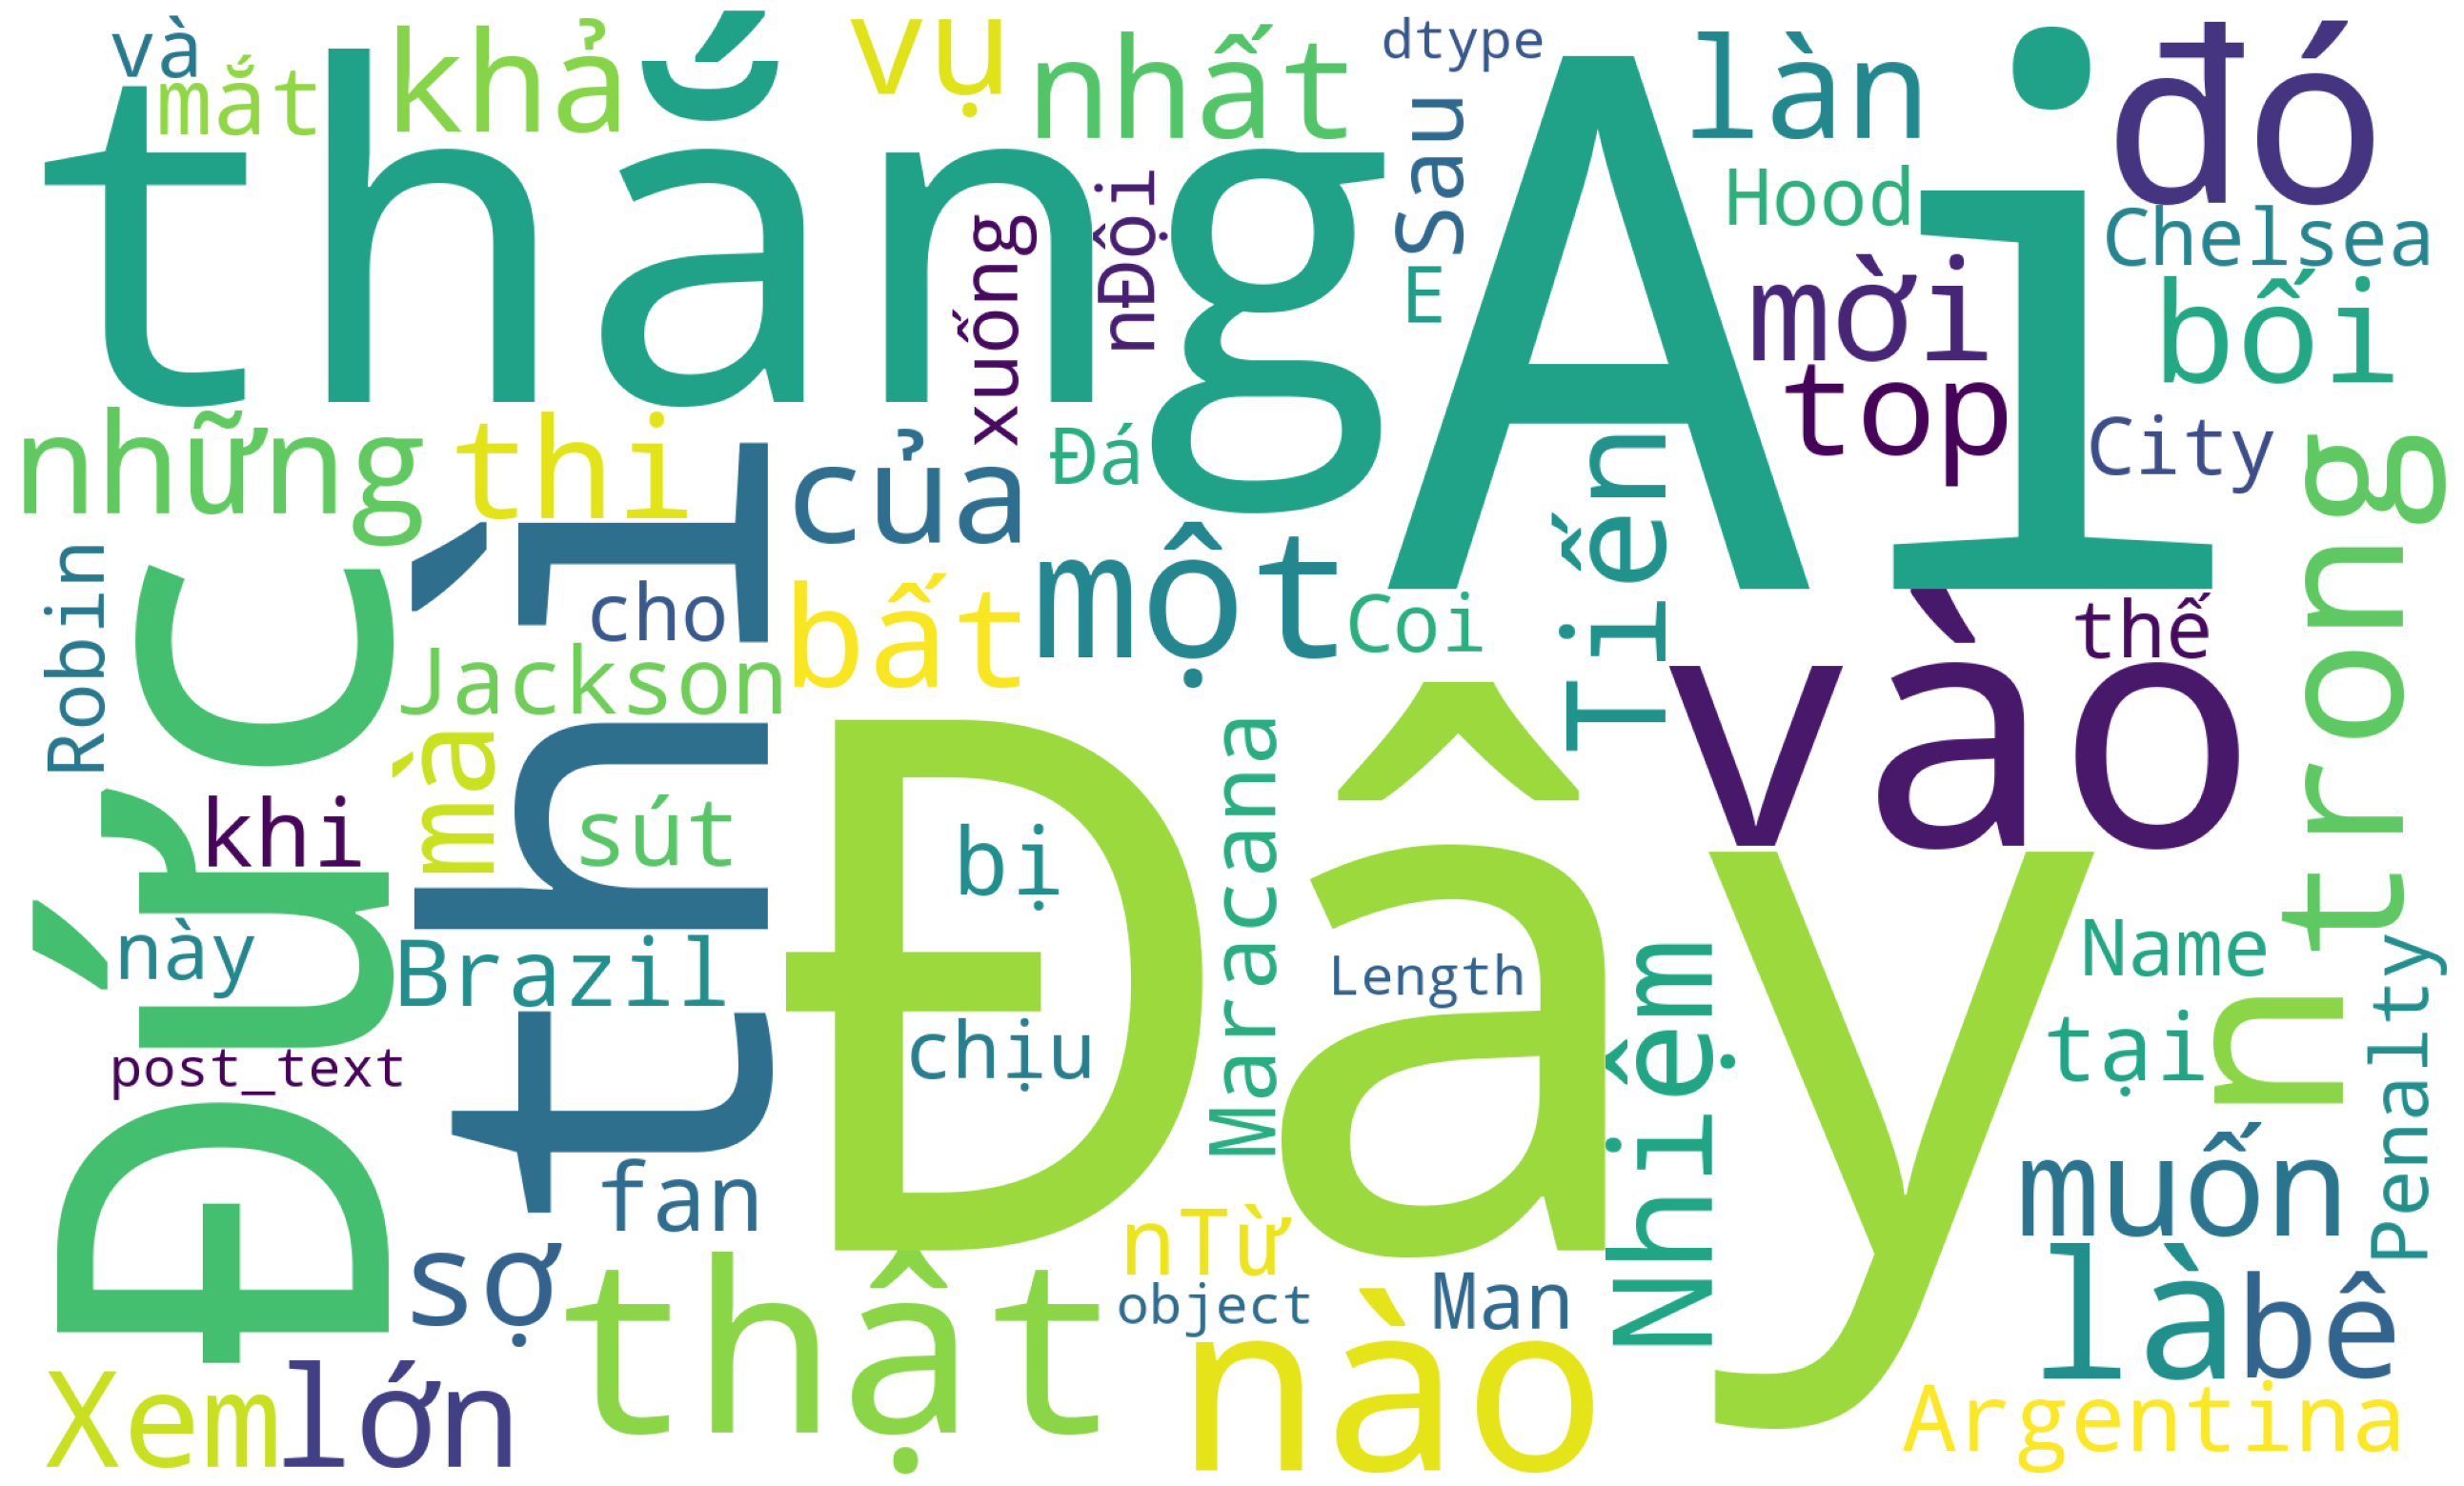

In [21]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=2000, height=1200
                         ).generate(text)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


# Sự tương quan giữa số lượng reactions với các trường khác như số lượng comment, độ dài bài viết

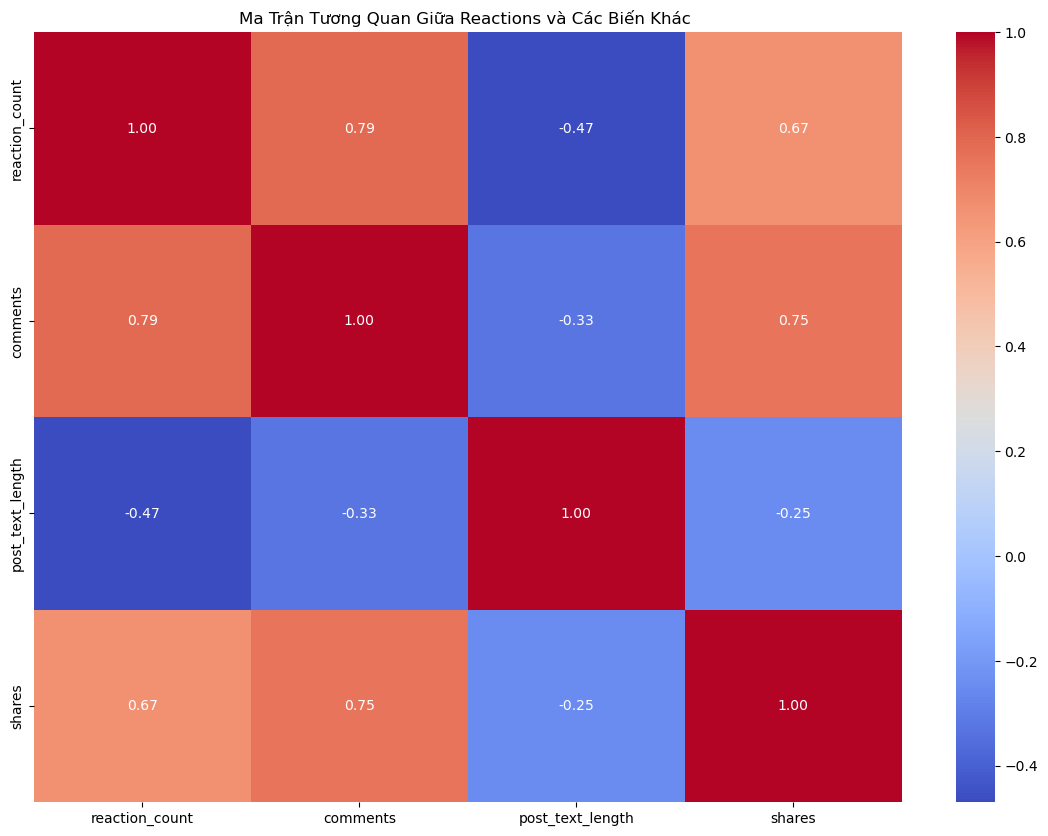

In [22]:

df['post_text_length'] = df['text'].apply(len)
correlation_matrix = df[['reaction_count', 'comments','post_text_length', 'shares']].corr()
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Ma Trận Tương Quan Giữa Reactions và Các Biến Khác ')
plt.show()